In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading Dataset

data = pd.read_csv('waterQuality1.csv')

In [3]:
# To see first set of values

data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


# Data Pre-processing

In [4]:
# Shape of the dataset: rows,columns

data.shape

(7999, 21)

In [5]:
# To see count of duplicated rows

data.duplicated().sum()

0

In [6]:
# To see missing values of each columns

data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [8]:
# Dropping unnecessary columns

data.drop(data.columns[[3,5,6,7,11,13,15,17,18,19]], axis=1, inplace=True)

In [9]:
# Identifying invalid values like: "#NUM!"

non_numeric_values = data.select_dtypes(exclude=np.number).columns
print(non_numeric_values)

Index(['ammonia', 'is_safe'], dtype='object')


In [10]:
data[data["ammonia"] == "#NUM!"]

,aluminium,ammonia,arsenic,cadmium,flouride,bacteria,viruses,nitrates,mercury,radium,is_safe
7551,0.03,#NUM!,0.08,0.07,0.34,0.00,0.0,4.37,0.007,2.54,#NUM!
7568,0.06,#NUM!,0.07,0.08,0.61,0.00,0.0,12.10,0.008,2.05,#NUM!
7890,0.01,#NUM!,0.08,0.00,0.72,0.57,0.0,9.57,0.009,7.70,#NUM!


In [11]:
data[data["is_safe"] == "#NUM!"]

,aluminium,ammonia,arsenic,cadmium,flouride,bacteria,viruses,nitrates,mercury,radium,is_safe
7551,0.03,#NUM!,0.08,0.07,0.34,0.00,0.0,4.37,0.007,2.54,#NUM!
7568,0.06,#NUM!,0.07,0.08,0.61,0.00,0.0,12.10,0.008,2.05,#NUM!
7890,0.01,#NUM!,0.08,0.00,0.72,0.57,0.0,9.57,0.009,7.70,#NUM!


In [12]:
# Removing rows of invalid values

data.drop([7551,7568,7890], axis=0, inplace = True)

In [13]:
data['ammonia'] = data['ammonia'].astype(float)
data['is_safe'] = data['is_safe'].astype(int)

In [14]:
# New shape

data.shape

(7996, 11)

In [15]:
data.head(10)

,aluminium,ammonia,arsenic,cadmium,flouride,bacteria,viruses,nitrates,mercury,radium,is_safe
0,1.65,9.08,0.04,0.007,0.05,0.20,0.000,16.08,0.007,6.78,1
1,2.32,21.16,0.01,0.002,0.90,0.65,0.650,2.01,0.003,3.21,1
2,1.01,14.02,0.04,0.008,0.99,0.05,0.003,14.16,0.006,7.07,0
3,1.36,11.33,0.04,0.001,1.08,0.71,0.710,1.41,0.004,1.72,1
4,0.92,24.33,0.03,0.006,0.61,0.13,0.001,6.74,0.003,2.41,1
5,0.94,14.47,0.03,0.003,0.11,0.67,0.670,9.75,0.006,5.42,1
6,2.36,5.60,0.01,0.004,0.33,0.13,0.007,18.60,0.007,2.84,0
7,3.93,19.87,0.04,0.001,0.86,0.16,0.005,13.65,0.001,7.24,0
8,0.60,24.58,0.01,0.005,0.98,0.35,0.002,14.66,0.004,4.99,1
9,0.22,16.76,0.02,0.007,1.24,0.83,0.830,4.79,0.010,0.08,1


# Split the dataset

In [16]:
# for testing set, 20% of dataset


In [17]:
x = data.drop('is_safe', axis=1)
y = data['is_safe']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [20]:
x_train

,aluminium,ammonia,arsenic,cadmium,flouride,bacteria,viruses,nitrates,mercury,radium
5722,0.08,23.16,0.09,0.050,0.52,0.45,0.008,18.71,0.009,5.83
2337,0.01,23.34,0.04,0.002,0.88,0.59,0.590,6.40,0.003,1.75
1578,4.43,22.58,0.94,0.130,0.59,0.00,0.750,4.66,0.010,1.03
6523,0.10,19.21,0.05,0.070,1.16,0.94,0.940,4.18,0.008,1.53
7619,0.06,0.37,0.01,0.040,0.69,0.00,0.000,11.19,0.006,2.31
...,...,...,...,...,...,...,...,...,...,...
5226,0.07,16.98,0.08,0.090,0.21,0.00,0.610,3.15,0.010,4.19
5390,0.07,3.24,0.03,0.000,1.38,0.00,0.009,19.11,0.005,0.67
860,2.16,14.73,0.01,0.009,0.47,0.00,0.000,12.61,0.005,4.45
7605,0.05,7.99,0.04,0.100,0.41,0.00,0.000,19.82,0.001,0.76


In [21]:
x_test

,aluminium,ammonia,arsenic,cadmium,flouride,bacteria,viruses,nitrates,mercury,radium
5488,0.01,0.13,0.09,0.050,1.32,0.00,0.990,17.60,0.003,0.90
2577,0.27,26.73,0.04,0.007,0.26,0.55,0.550,1.74,0.008,1.34
3692,0.02,17.13,0.26,0.110,0.13,0.94,0.940,6.06,0.002,4.64
7465,0.01,3.25,0.07,0.060,1.29,0.00,0.000,17.04,0.004,4.98
7564,0.02,1.95,0.07,0.010,0.33,0.00,0.000,2.46,0.000,1.46
...,...,...,...,...,...,...,...,...,...,...
6574,0.01,26.45,0.07,0.080,0.80,0.13,0.009,16.11,0.006,0.12
1115,3.83,19.07,0.92,0.110,0.50,0.00,0.000,18.97,0.001,3.09
7162,0.09,0.22,0.05,0.070,0.79,0.73,0.730,5.33,0.006,2.99
6734,0.05,11.71,0.08,0.060,1.15,0.97,0.970,13.11,0.007,0.44


In [22]:
y_train

5722    0
2337    0
1578    0
6523    0
7619    0
       ..
5226    0
5390    0
860     1
7605    0
7270    0
Name: is_safe, Length: 6396, dtype: int32

In [23]:
y_test

5488    0
2577    0
3692    1
7465    0
7564    0
       ..
6574    0
1115    0
7162    0
6734    0
1467    0
Name: is_safe, Length: 1600, dtype: int32

In [24]:
y_train.value_counts()

is_safe
0    5684
1     712
Name: count, dtype: int64

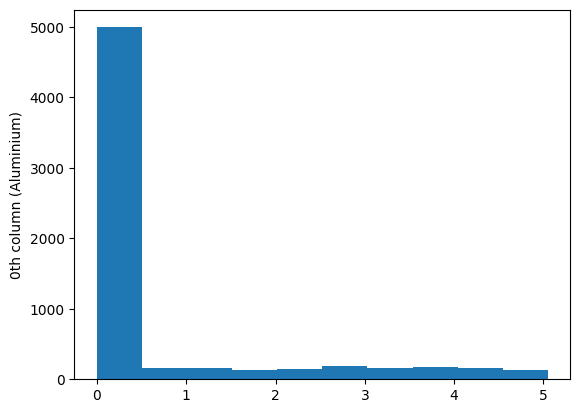

In [25]:
plt.hist(x_train.iloc[:,0])
plt.ylabel('0th column (Aluminium)')
plt.show()

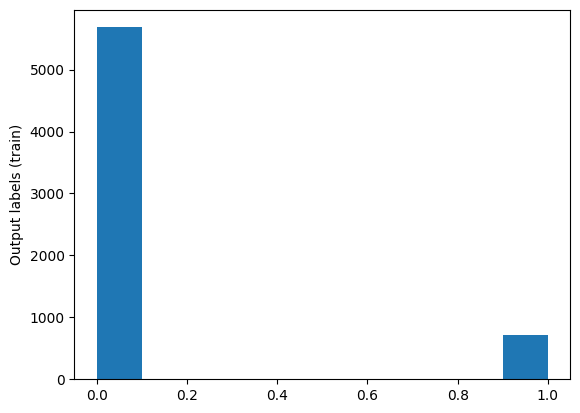

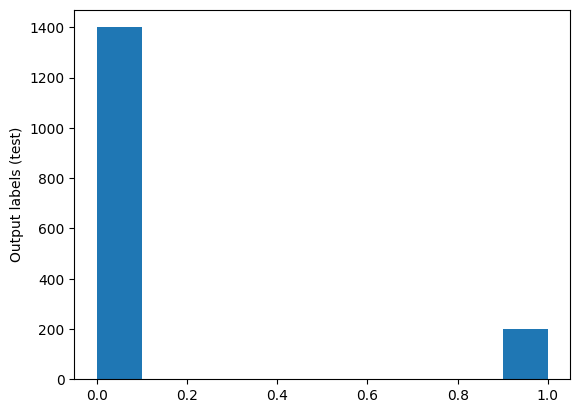

In [26]:
# Distribution of output values (0 - not safe, 1 - safe)

plt.hist(y_train)
plt.ylabel('Output labels (train)')
plt.show()

plt.hist(y_test)
plt.ylabel('Output labels (test)')
plt.show()

In [27]:
# above unbalanced data, have to normalize (standardization)

mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [28]:
print(mean)
print(std)

aluminium     0.661098
ammonia      14.262189
arsenic       0.161044
cadmium       0.042567
flouride      0.774118
bacteria      0.319553
viruses       0.329935
nitrates      9.728182
mercury       0.005162
radium        2.910111
dtype: float64
aluminium    1.263307
ammonia      8.892313
arsenic      0.253033
cadmium      0.036005
flouride     0.433950
bacteria     0.329248
viruses      0.377832
nitrates     5.540314
mercury      0.002971
radium       2.317115
dtype: float64


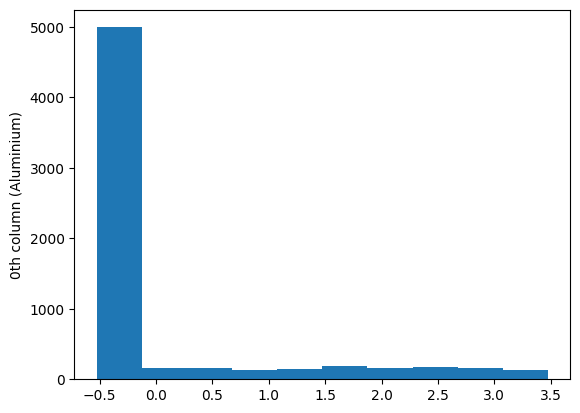

In [29]:
plt.hist(x_train.iloc[:,0])
plt.ylabel('0th column (Aluminium)')
plt.show()

In [30]:
# Review the dimentions of training and testing set

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(x_train.iloc[0:3,])
print(y_train.iloc[0:3])
print(x_test.iloc[0:3,])
print(y_test.iloc[0:3])

(6396, 10)
(6396,)
(1600, 10)
(1600,)
      aluminium   ammonia   arsenic   cadmium  flouride  bacteria   viruses  \
5722  -0.459981  1.000618 -0.280770  0.206455 -0.585593  0.396197 -0.852059   
2337  -0.515391  1.020860 -0.478372 -1.126697  0.243995  0.821408  0.688308   
1578   2.983362  0.935393  3.078474  2.428376 -0.424284 -0.970553  1.111776   

      nitrates   mercury    radium  
5722  1.621175  1.291459  1.260140  
2337 -0.600721 -0.727731 -0.500670  
1578 -0.914782  1.627990 -0.811402  
5722    0
2337    0
1578    0
Name: is_safe, dtype: int32
      aluminium   ammonia   arsenic   cadmium  flouride  bacteria   viruses  \
5488  -0.515391 -1.589259 -0.280770  0.206455  1.257937 -0.970553  1.746979   
2577  -0.309582  1.402089 -0.478372 -0.987827 -1.184741  0.699919  0.582440   
3692  -0.507476  0.322505  0.391079  1.872896 -1.484315  1.884435  1.614645   

      nitrates   mercury    radium  
5488  1.420825 -0.727731 -0.867506  
2577 -1.441828  0.954927 -0.677615  
3692 -0.662

# Create a Neural Network Model

In [31]:
# 8 neurons in layer 1
# 4 neurons in layer 2
# 1 neuron1 in last layer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, activation='relu', input_dim = len(x_train.columns)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


# Compile the Model

In [32]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model

In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'my_best_model.hdf5', monitor = 'val_loss', save_best_only = True, save_weights_only = True)
callback_b = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 20, verbose = 1)

In [34]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 256, batch_size = 10, callbacks = [callback_a, callback_b])


Epoch 1/256
640/640 [==============================] - 6s 6ms/step - loss: 0.3664 - accuracy: 0.8729 - val_loss: 0.3267 - val_accuracy: 0.8806
Epoch 2/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2775 - accuracy: 0.8956 - val_loss: 0.3039 - val_accuracy: 0.8881
Epoch 3/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2639 - accuracy: 0.9001 - val_loss: 0.2885 - val_accuracy: 0.8969
Epoch 4/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2551 - accuracy: 0.9024 - val_loss: 0.2818 - val_accuracy: 0.8956
Epoch 5/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2488 - accuracy: 0.9079 - val_loss: 0.2790 - val_accuracy: 0.8956
Epoch 6/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2443 - accuracy: 0.9101 - val_loss: 0.2687 - val_accuracy: 0.9019
Epoch 7/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2394 - accuracy: 0.9128 - val_loss: 0.2658 - val_accuracy: 0.9013

Epoch 58/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2107 - accuracy: 0.9239 - val_loss: 0.2354 - val_accuracy: 0.9050
Epoch 59/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2107 - accuracy: 0.9242 - val_loss: 0.2329 - val_accuracy: 0.9069
Epoch 60/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2104 - accuracy: 0.9229 - val_loss: 0.2330 - val_accuracy: 0.9075
Epoch 61/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2104 - accuracy: 0.9240 - val_loss: 0.2348 - val_accuracy: 0.9062
Epoch 62/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2102 - accuracy: 0.9242 - val_loss: 0.2339 - val_accuracy: 0.9075
Epoch 63/256
640/640 [==============================] - 3s 4ms/step - loss: 0.2100 - accuracy: 0.9237 - val_loss: 0.2399 - val_accuracy: 0.9062
Epoch 64/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2102 - accuracy: 0.9242 - val_loss: 0.2375 - val_accuracy:

# Check the Learning Curves

In [35]:
print(history.params)

{'verbose': 1, 'epochs': 256, 'steps': 640}


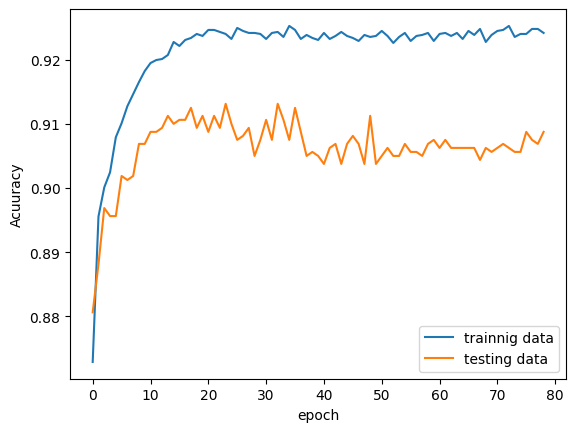

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Acuuracy')
plt.xlabel('epoch')
plt.legend(['trainnig data', 'testing data'], loc = 'lower right')
plt.show()

In [37]:
model.load_weights('my_best_model.hdf5')

In [38]:
# Evaluate model on the training data

scores = model.evaluate(x_train, y_train)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

200/200 [==============================] - 1s 4ms/step - loss: 0.2084 - accuracy: 0.9240
['loss', 'accuracy']
[0.2084125578403473, 0.9240149855613708]

accuracy: 92.40%


In [39]:
# Evaluate on validation set

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 4ms/step - loss: 0.2329 - accuracy: 0.9069

accuracy: 90.69%


In [40]:
# Check what the model actually predicts

print(x_test[0:5])
print(y_test[0:5])

      aluminium   ammonia   arsenic   cadmium  flouride  bacteria   viruses  \
5488  -0.515391 -1.589259 -0.280770  0.206455  1.257937 -0.970553  1.746979   
2577  -0.309582  1.402089 -0.478372 -0.987827 -1.184741  0.699919  0.582440   
3692  -0.507476  0.322505  0.391079  1.872896 -1.484315  1.884435  1.614645   
7465  -0.515391 -1.238394 -0.359811  0.484195  1.188805 -0.970553 -0.873232   
7564  -0.507476 -1.384588 -0.359811 -0.904505 -1.023432 -0.970553 -0.873232   

      nitrates   mercury    radium  
5488  1.420825 -0.727731 -0.867506  
2577 -1.441828  0.954927 -0.677615  
3692 -0.662089 -1.064263  0.746570  
7465  1.319748 -0.391200  0.893304  
7564 -1.311872 -1.737326 -0.625826  
5488    0
2577    0
3692    1
7465    0
7564    0
Name: is_safe, dtype: int32


In [41]:
prediction = model.predict(x_test)

50/50 [==============================] - 0s 3ms/step


In [42]:
print(prediction[0:10])

[[0.00065484]
 [0.38322607]
 [0.00464926]
 [0.03640389]
 [0.09073002]
 [0.01453923]
 [0.01112388]
 [0.07342947]
 [0.0749556 ]
 [0.02371067]]


In [43]:
print(prediction[0:10].round(2))

[[0.  ]
 [0.38]
 [0.  ]
 [0.04]
 [0.09]
 [0.01]
 [0.01]
 [0.07]
 [0.07]
 [0.02]]


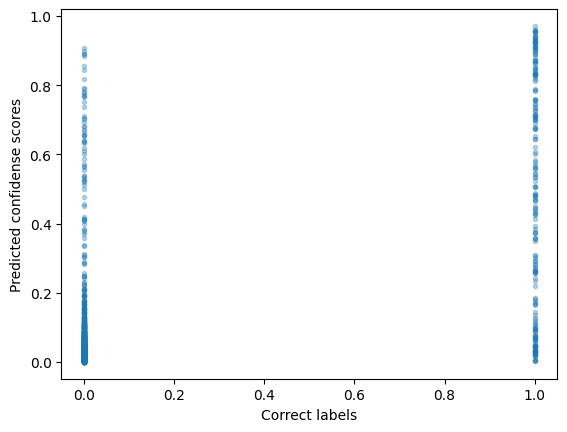

In [44]:
plt.plot(y_test, prediction, '.', alpha = 0.3)
plt.xlabel('Correct labels')
plt.ylabel('Predicted confidense scores')
plt.show()

In [45]:
# Is 'accuracy' sufficient to evaluate the model?

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, prediction.round())
precision = precision_score(y_test, prediction.round())
recall = recall_score(y_test, prediction.round())
f1score = f1_score(y_test, prediction.round())

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f%%" % (f1score))

Accuracy: 90.69%
Precision: 67.59%
Recall: 49.00%
F1-score: 0.57%


In [46]:
# Improvement of performance



In [47]:
model.predict(x_test)

50/50 [==============================] - 0s 3ms/step


array([[0.00065484],
       [0.38322607],
       [0.00464926],
       ...,
       [0.0269655 ],
       [0.00934985],
       [0.02463257]], dtype=float32)

# Re-training the Model

In [48]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 128, batch_size = 10, callbacks = [callback_a, callback_b])

Epoch 1/128
640/640 [==============================] - 3s 5ms/step - loss: 0.2101 - accuracy: 0.9234 - val_loss: 0.2416 - val_accuracy: 0.9038
Epoch 2/128
640/640 [==============================] - 3s 5ms/step - loss: 0.2109 - accuracy: 0.9232 - val_loss: 0.2347 - val_accuracy: 0.9069
Epoch 3/128
640/640 [==============================] - 3s 5ms/step - loss: 0.2111 - accuracy: 0.9234 - val_loss: 0.2342 - val_accuracy: 0.9069
Epoch 4/128
640/640 [==============================] - 3s 5ms/step - loss: 0.2108 - accuracy: 0.9237 - val_loss: 0.2326 - val_accuracy: 0.9062
Epoch 5/128
640/640 [==============================] - 3s 5ms/step - loss: 0.2104 - accuracy: 0.9242 - val_loss: 0.2323 - val_accuracy: 0.9075
Epoch 6/128
640/640 [==============================] - 3s 5ms/step - loss: 0.2103 - accuracy: 0.9234 - val_loss: 0.2354 - val_accuracy: 0.9056
Epoch 7/128
640/640 [==============================] - 3s 5ms/step - loss: 0.2108 - accuracy: 0.9235 - val_loss: 0.2347 - val_accuracy: 0.9056

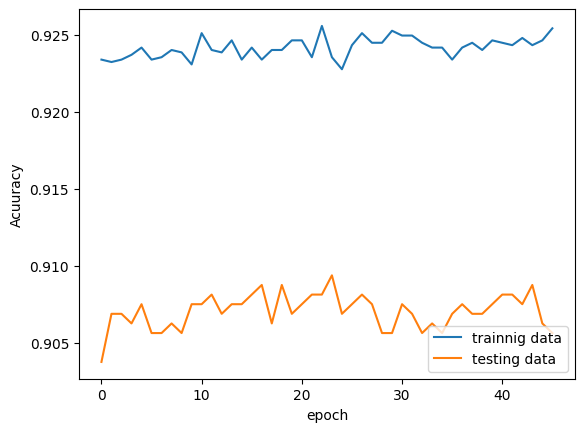

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Acuuracy')
plt.xlabel('epoch')
plt.legend(['trainnig data', 'testing data'], loc = 'lower right')
plt.show()

In [50]:
model.load_weights('my_best_model.hdf5')

In [51]:
# Evaluate model on the training data

scores = model.evaluate(x_train, y_train)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

200/200 [==============================] - 1s 3ms/step - loss: 0.2085 - accuracy: 0.9246
['loss', 'accuracy']
[0.2085248976945877, 0.924640417098999]

accuracy: 92.46%


In [52]:
# Evaluate on validation set

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 4ms/step - loss: 0.2310 - accuracy: 0.9075

accuracy: 90.75%


In [53]:
prediction = model.predict(x_test)

50/50 [==============================] - 0s 3ms/step


In [54]:
# Is 'accuracy' sufficient to evaluate the model?

accuracy = accuracy_score(y_test, prediction.round())
precision = precision_score(y_test, prediction.round())
recall = recall_score(y_test, prediction.round())
f1score = f1_score(y_test, prediction.round())

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f%%" % (f1score))

Accuracy: 90.75%
Precision: 67.33%
Recall: 50.50%
F1-score: 0.58%


In [55]:
# Re-train - 2

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 64, batch_size = 10, callbacks = [callback_a, callback_b])

Epoch 1/64
640/640 [==============================] - 3s 5ms/step - loss: 0.2096 - accuracy: 0.9240 - val_loss: 0.2413 - val_accuracy: 0.9062
Epoch 2/64
640/640 [==============================] - 3s 5ms/step - loss: 0.2104 - accuracy: 0.9245 - val_loss: 0.2320 - val_accuracy: 0.9081
Epoch 3/64
640/640 [==============================] - 3s 5ms/step - loss: 0.2098 - accuracy: 0.9242 - val_loss: 0.2317 - val_accuracy: 0.9087
Epoch 4/64
640/640 [==============================] - 3s 5ms/step - loss: 0.2100 - accuracy: 0.9256 - val_loss: 0.2312 - val_accuracy: 0.9075
Epoch 5/64
640/640 [==============================] - 3s 5ms/step - loss: 0.2100 - accuracy: 0.9240 - val_loss: 0.2361 - val_accuracy: 0.9056
Epoch 6/64
640/640 [==============================] - 3s 5ms/step - loss: 0.2102 - accuracy: 0.9243 - val_loss: 0.2341 - val_accuracy: 0.9081
Epoch 7/64
640/640 [==============================] - 3s 5ms/step - loss: 0.2103 - accuracy: 0.9240 - val_loss: 0.2332 - val_accuracy: 0.9050
Epoch 

In [56]:
model.load_weights('my_best_model.hdf5')

In [57]:
# Evaluate model on the training data

scores = model.evaluate(x_train, y_train)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

200/200 [==============================] - 1s 3ms/step - loss: 0.2085 - accuracy: 0.9246
['loss', 'accuracy']
[0.2085248976945877, 0.924640417098999]

accuracy: 92.46%


In [58]:
# Evaluate on validation set

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 4ms/step - loss: 0.2310 - accuracy: 0.9075

accuracy: 90.75%


In [59]:
# Re-train - 3

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 10, callbacks = [callback_a, callback_b])

Epoch 1/100
640/640 [==============================] - 3s 5ms/step - loss: 0.2101 - accuracy: 0.9232 - val_loss: 0.2323 - val_accuracy: 0.9069
Epoch 2/100
640/640 [==============================] - 3s 5ms/step - loss: 0.2097 - accuracy: 0.9234 - val_loss: 0.2317 - val_accuracy: 0.9087
Epoch 3/100
640/640 [==============================] - 3s 5ms/step - loss: 0.2105 - accuracy: 0.9240 - val_loss: 0.2331 - val_accuracy: 0.9062
Epoch 4/100
640/640 [==============================] - 3s 5ms/step - loss: 0.2099 - accuracy: 0.9245 - val_loss: 0.2335 - val_accuracy: 0.9075
Epoch 5/100
640/640 [==============================] - 3s 5ms/step - loss: 0.2100 - accuracy: 0.9242 - val_loss: 0.2329 - val_accuracy: 0.9075
Epoch 6/100
640/640 [==============================] - 3s 5ms/step - loss: 0.2103 - accuracy: 0.9243 - val_loss: 0.2319 - val_accuracy: 0.9069
Epoch 7/100
640/640 [==============================] - 3s 5ms/step - loss: 0.2096 - accuracy: 0.9246 - val_loss: 0.2388 - val_accuracy: 0.9050

In [60]:
model.load_weights('my_best_model.hdf5')

In [61]:
# Evaluate model on the training data

scores = model.evaluate(x_train, y_train)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

200/200 [==============================] - 1s 3ms/step - loss: 0.2085 - accuracy: 0.9246
['loss', 'accuracy']
[0.2085248976945877, 0.924640417098999]

accuracy: 92.46%


In [62]:
# Evaluate on validation set

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 3ms/step - loss: 0.2310 - accuracy: 0.9075

accuracy: 90.75%


In [63]:
# Re-train - 4

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 250, batch_size = 10, callbacks = [callback_a, callback_b])

Epoch 1/250
640/640 [==============================] - 3s 5ms/step - loss: 0.2098 - accuracy: 0.9242 - val_loss: 0.2355 - val_accuracy: 0.9069
Epoch 2/250
640/640 [==============================] - 3s 5ms/step - loss: 0.2097 - accuracy: 0.9243 - val_loss: 0.2320 - val_accuracy: 0.9062
Epoch 3/250
640/640 [==============================] - 3s 5ms/step - loss: 0.2095 - accuracy: 0.9264 - val_loss: 0.2400 - val_accuracy: 0.9056
Epoch 4/250
640/640 [==============================] - 3s 5ms/step - loss: 0.2103 - accuracy: 0.9248 - val_loss: 0.2371 - val_accuracy: 0.9062
Epoch 5/250
640/640 [==============================] - 3s 4ms/step - loss: 0.2105 - accuracy: 0.9235 - val_loss: 0.2327 - val_accuracy: 0.9069
Epoch 6/250
640/640 [==============================] - 3s 5ms/step - loss: 0.2100 - accuracy: 0.9245 - val_loss: 0.2360 - val_accuracy: 0.9044
Epoch 7/250
640/640 [==============================] - 3s 5ms/step - loss: 0.2099 - accuracy: 0.9237 - val_loss: 0.2325 - val_accuracy: 0.9075

In [64]:
model.load_weights('my_best_model.hdf5')

In [65]:
# Evaluate model on the training data

scores = model.evaluate(x_train, y_train)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

200/200 [==============================] - 1s 3ms/step - loss: 0.2087 - accuracy: 0.9245
['loss', 'accuracy']
[0.20868855714797974, 0.9244840741157532]

accuracy: 92.45%


In [66]:
# Evaluate on validation set

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 4ms/step - loss: 0.2300 - accuracy: 0.9081

accuracy: 90.81%


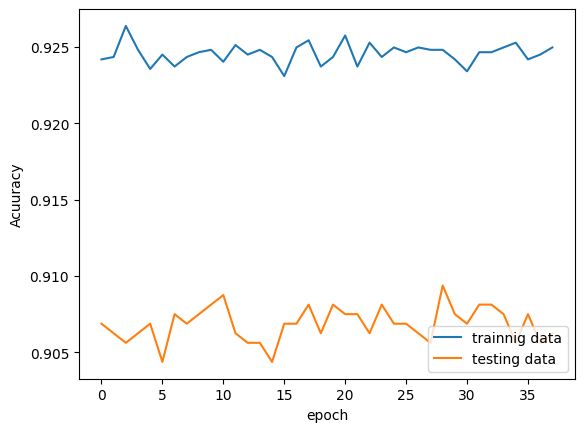

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Acuuracy')
plt.xlabel('epoch')
plt.legend(['trainnig data', 'testing data'], loc = 'lower right')
plt.show()

In [68]:
# 16 neurons in layer 1
# 8 neurons in layer 2
# 1 neuron1 in last layer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_dim = len(x_train.columns)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                176       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'my_best_model.hdf5', monitor = 'val_loss', save_best_only = True, save_weights_only = True)
callback_b = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 20, verbose = 1)

In [71]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 256, batch_size = 10, callbacks = [callback_a, callback_b])


Epoch 1/256
640/640 [==============================] - 5s 5ms/step - loss: 0.3327 - accuracy: 0.8762 - val_loss: 0.3030 - val_accuracy: 0.8806
Epoch 2/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2642 - accuracy: 0.8995 - val_loss: 0.2852 - val_accuracy: 0.8950
Epoch 3/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2521 - accuracy: 0.9054 - val_loss: 0.2752 - val_accuracy: 0.8963
Epoch 4/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2420 - accuracy: 0.9090 - val_loss: 0.2636 - val_accuracy: 0.8981
Epoch 5/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2334 - accuracy: 0.9146 - val_loss: 0.2560 - val_accuracy: 0.9031
Epoch 6/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2275 - accuracy: 0.9185 - val_loss: 0.2537 - val_accuracy: 0.9019
Epoch 7/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2229 - accuracy: 0.9195 - val_loss: 0.2537 - val_accuracy: 0.9050

Epoch 58/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2029 - accuracy: 0.9256 - val_loss: 0.2363 - val_accuracy: 0.9162
Epoch 59/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2034 - accuracy: 0.9267 - val_loss: 0.2351 - val_accuracy: 0.9112
Epoch 60/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2025 - accuracy: 0.9270 - val_loss: 0.2335 - val_accuracy: 0.9131
Epoch 61/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2029 - accuracy: 0.9260 - val_loss: 0.2348 - val_accuracy: 0.9137
Epoch 62/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2031 - accuracy: 0.9254 - val_loss: 0.2346 - val_accuracy: 0.9125
Epoch 63/256
640/640 [==============================] - 3s 4ms/step - loss: 0.2026 - accuracy: 0.9276 - val_loss: 0.2386 - val_accuracy: 0.9094
Epoch 64/256
640/640 [==============================] - 3s 5ms/step - loss: 0.2022 - accuracy: 0.9262 - val_loss: 0.2361 - val_accuracy:

In [72]:
model.load_weights('my_best_model.hdf5')

In [73]:
# Evaluate model on the training data

scores = model.evaluate(x_train, y_train)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

200/200 [==============================] - 1s 3ms/step - loss: 0.1988 - accuracy: 0.9264
['loss', 'accuracy']
[0.19880793988704681, 0.9263602495193481]

accuracy: 92.64%


In [74]:
# Evaluate on validation set

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 4ms/step - loss: 0.2314 - accuracy: 0.9162

accuracy: 91.62%


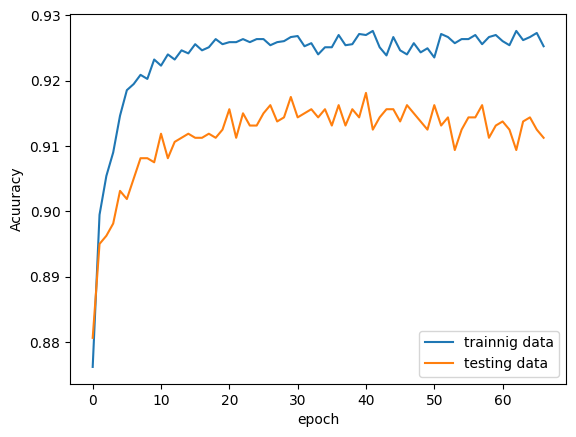

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Acuuracy')
plt.xlabel('epoch')
plt.legend(['trainnig data', 'testing data'], loc = 'lower right')
plt.show()

In [76]:
prediction = model.predict(x_test)

50/50 [==============================] - 0s 3ms/step


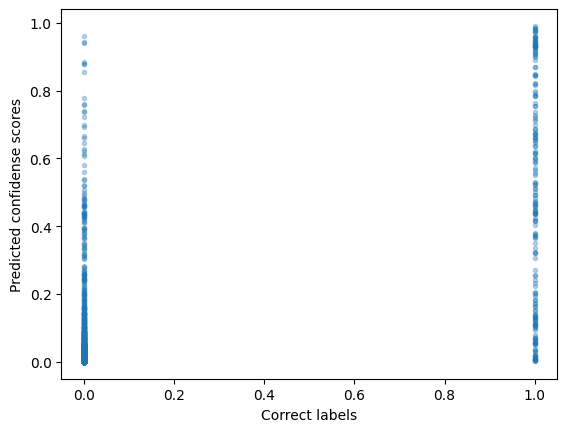

In [77]:
plt.plot(y_test, prediction, '.', alpha = 0.3)
plt.xlabel('Correct labels')
plt.ylabel('Predicted confidense scores')
plt.show()

In [78]:
# Is 'accuracy' sufficient to evaluate the model?

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, prediction.round())
precision = precision_score(y_test, prediction.round())
recall = recall_score(y_test, prediction.round())
f1score = f1_score(y_test, prediction.round())

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f%%" % (f1score))

Accuracy: 91.62%
Precision: 76.61%
Recall: 47.50%
F1-score: 0.59%
